In [420]:
import random
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from collections import Counter

 ## Questao 1 - Exemplo 1

In [124]:
def get_influencers(position,N):
    
    if position == 1:
        inf = [N,2]
    elif position == N:
        inf = [N-1,1]
    else:
        inf = [position-1,position+1]
    
    return(inf)

def initialize_network(N,O):
    
    X = random.choices(O,k=N)
    
    G = nx.DiGraph()
    G.add_nodes_from(range(1,N))
    
    for i in range(1,N+1):
        inf1,inf2 = get_influencers(i,N)
        G.add_edges_from(([inf1,i],[inf2,i]))
    
    df = pd.DataFrame()
    df['node'] = range(1,N+1)
    df['opinion']=X
    
    node_attr = df.set_index('node').to_dict('index')
    nx.set_node_attributes(G, node_attr)
    
    return(G)

def color(a):
    if a == 1:
        return('yellow')
    else:
        return('orange')
    
def show_network(G):
    
    opinions = nx.get_node_attributes(G,'opinion').values()
    pos = nx.circular_layout(G)

    nx.draw(G, with_labels=True, node_size=500, pos=pos, node_color=list(map(color,opinions)))
    plt.show()

In [125]:
def update_graph(G):
    
    N = len(G.nodes)
    
    An = random.randint(1,N)
    influencers = list(G.neighbors(An))
    
    ############# MUDANÇA DA AULA 1 PARA AULA 2 ###################
    chosen_influencer = random.choice(influencers)
    new_opinion = nx.get_node_attributes(G,'opinion')[chosen_influencer]
    G.nodes[An]['opinion'] = new_opinion
    
    return(G,An,chosen_influencer)
    ###############################################################

def update_graph_T_times(G,T,show=False):
    
    N = len(G.nodes)
    
    ############ MUDANÇA ########################
    
    origins = []
    
    for i in range(T):
        G,influenced,influencer = update_graph(G)
        origins.append((influencer,influenced))
        
    #############################################
    
    if show==True:
            show_network(G)
            
    return(G,origins)

def update_graph_until_consensus(G):
    
    k=0
    N = len(G.nodes)
    evolution = []
    #
    origins = []
    #
    sum_of_opinions = sum(nx.get_node_attributes(G,'opinion').values())
     
    while sum_of_opinions!=0 and sum_of_opinions!=N:
        G,influenced,influencer=update_graph(G)
        sum_of_opinions = sum(nx.get_node_attributes(G,'opinion').values())
        evolution.append(sum_of_opinions)
        #
        origins.append((influencer,influenced))
        #
        k+=1
            
    return(k,evolution,origins)

In [126]:
def seek_opinion_origin(origins,actor):
    
    origins = origins[::-1]
    
    for influencer,influenced in origins:

        if actor == influenced:
            actor = influencer
        else:
            pass
    
    return(actor)

In [127]:
def get_all_opinions_origin(origins,actors):
    
    all_origins = {}
    
    for actor in actors:
        all_origins[actor] = seek_opinion_origin(origins,actor)
    
    return(all_origins)

### Vamos checar a origem da opiniao dos N=10 atores depois de T=100 rodadas

In [128]:
def plot_opinion_origins(origins):
    
    dest_orig = get_all_opinions_origin(origins,range(1,11))
    
    source = list(dest_orig.values())
    target = list(dest_orig.keys())

    staptsx=[1]*len(dest_orig)
    endptsx=[4]*len(dest_orig)
    
    toPlot = zip(staptsx, source, endptsx, target)
    for tuple in toPlot:
        plt.plot([tuple[0], tuple[2]], [tuple[1], tuple[3]],color='red')

    x=[1]*10+[4]*10
    y=list(range(1,11))*2

    for i, txt in enumerate(y):
        plt.annotate(txt, (x[i], y[i]))

    plt.scatter(x,y,marker='o')
    plt.show()

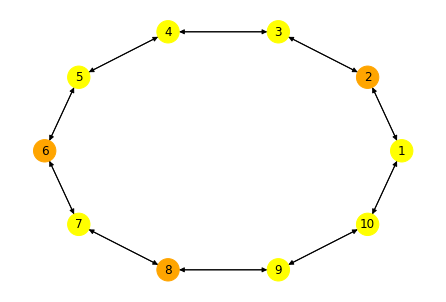

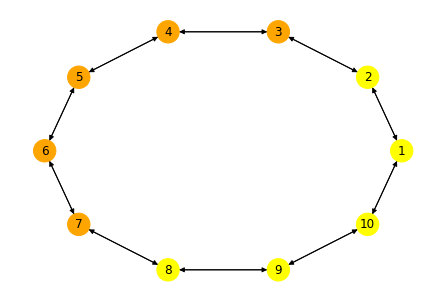

In [112]:
O = [0,1] # lista de opinioes
N=10
T=100

G=initialize_network(N,O)
show_network(G)
G,origins = update_graph_T_times(G,T)
show_network(G)

# Este plot é da rede inicial vs. rede apos T iteraçoes 

In [115]:
dest_orig = get_all_opinions_origin(origins,range(1,11))
dest_orig

{1: 5, 2: 5, 3: 2, 4: 2, 5: 2, 6: 2, 7: 2, 8: 5, 9: 5, 10: 5}

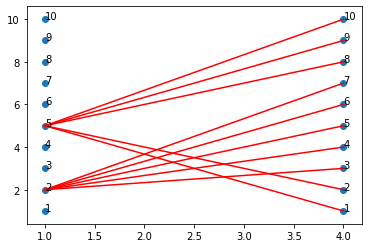

In [120]:
plot_opinion_origins(origins)

### Vamos checar a origem da opiniao dos N=10 atores no consenso

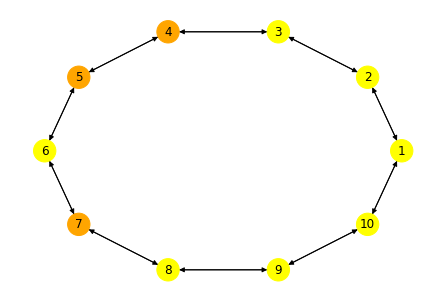

In [157]:
G=initialize_network(N,O)
show_network(G)
G,_,origins = update_graph_until_consensus(G)

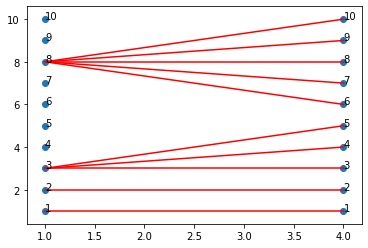

In [158]:
plot_opinion_origins(origins)

## Questao 1 - Exemplo 2

In [160]:
def get_influencers(position,N):
     
    x=position[0]
    y=position[1]
    
    if x > 1 and x < N and y > 1 and y < N:
        inf = [(x-1,y),(x+1,y),(x,y-1),(x,y+1)]
    elif ((x>1 and x<N) and (y==1 or y==N)):
        if y==1:
            inf = [(x-1,y),(x+1,y),(x,y+1),(x,N)]
        else:
            inf = [(x-1,y),(x+1,y),(x,y-1),(x,1)]
    elif ((y>1 and y<N) and (x==1 or x==N)):
        if x==1:
            inf = [(x,y-1),(x,y+1),(x+1,y),(N,y)]
        else:
            inf = [(x,y-1),(x,y+1),(x-1,y),(1,y)] 
    else:
        if x==1 and y==1:
            inf = [(1,2),(2,1),(N,1),(1,N)]
        elif x==N and y==N:
            inf = [(N-1,N),(N,N-1),(1,N),(N,1)]
        elif x==1 and y==N:
            inf = [(1,N-1),(2,N),(N,N),(1,1)]
        else:
            inf = [(N-1,1),(N,2),(N,N),(1,1)]
    
    return(inf)

def product(*args):
    if not args:
        return iter(((),)) # yield tuple()
    return (items + (item,) 
            for items in product(*args[:-1]) for item in args[-1])

def initialize_network(N,O):
    
    N2 = N**2
    X = random.choices(O,k=N2)
    actors = list(product(range(1,N+1),range(1,N+1)))
    
    G = nx.DiGraph()
    G.add_nodes_from(actors)
    
    for i in range(1,N+1):
        for j in range(1,N+1):
            inf1,inf2,inf3,inf4 = get_influencers((i,j),N)
            G.add_edges_from(([inf1,(i,j)],[inf2,(i,j)],[inf3,(i,j)],[inf4,(i,j)]))
    
    df = pd.DataFrame()
    df['node'] = actors
    df['opinion']=X
    
    node_attr = df.set_index('node').to_dict('index')
    nx.set_node_attributes(G, node_attr)
    
    return(G)

def update_graph(G):
    
    N2 = len(G.nodes)
    N=np.sqrt(N2)
    
    x = random.randint(1,N)
    y = random.randint(1,N)
    An = (x,y)
    influencers = list(G.neighbors(An))
    
    ############# MUDANÇA DA AULA 1 PARA AULA 2 ###################
    chosen_influencer = random.choice(influencers)
    new_opinion = nx.get_node_attributes(G,'opinion')[chosen_influencer]
    G.nodes[An]['opinion'] = new_opinion
    
    return(G,An,chosen_influencer)
    ###############################################################

### Vamos checar a origem da opiniao dos N=10 atores depois de T=100 rodadas

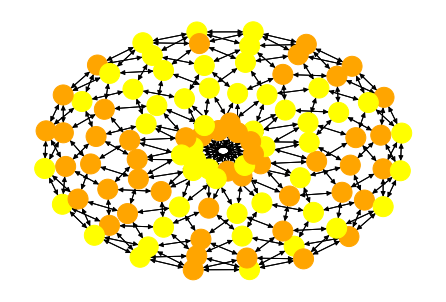

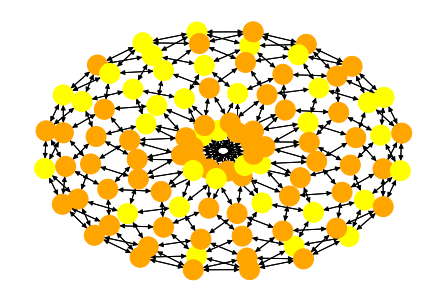

In [271]:
O = [0,1] # lista de opinioes
N=10
T=100

G=initialize_network(N,O)
opinions=nx.get_node_attributes(G,'opinion').values()
nx.draw(G,with_labels=False,node_size=400,node_color=list(map(color,opinions)),pos=nx.kamada_kawai_layout(G))
plt.show()

G,origins = update_graph_T_times(G,T)
opinions=nx.get_node_attributes(G,'opinion').values()
nx.draw(G,with_labels=False,node_size=400,node_color=list(map(color,opinions)),pos=nx.kamada_kawai_layout(G))

In [273]:
def bij(N2):
    x,y=N2
    n = 2**(x-1)*(2*y-1)
    return(n)


def get_opinion_origin_frequency(origins):
    
    actors = list(product(range(1,N+1),range(1,N+1)))
    dest_orig = get_all_opinions_origin(origins,actors)
    
    df = pd.DataFrame()
    df[0]=list(dest_orig.keys())
    df[1]=list(dest_orig.values())
    
    df[0] = df[0].apply(bij)
    df[1] = df[1].apply(bij)
    
    dest_orig = dict(zip(df[0],df[1]))
    count = Counter(list(dest_orig.values())).most_common()
    
    return(count)

### Here follows each actor and its respective opinion origin

In [272]:
actors = list(product(range(1,N+1),range(1,N+1)))
dest_orig = get_all_opinions_origin(origins,actors)

In [248]:
dest_orig

{(1, 1): (1, 10),
 (1, 2): (2, 2),
 (1, 3): (2, 3),
 (1, 4): (1, 5),
 (1, 5): (1, 5),
 (1, 6): (10, 6),
 (1, 7): (2, 8),
 (1, 8): (2, 8),
 (1, 9): (1, 9),
 (1, 10): (1, 10),
 (2, 1): (1, 10),
 (2, 2): (2, 2),
 (2, 3): (2, 2),
 (2, 4): (2, 2),
 (2, 5): (2, 4),
 (2, 6): (10, 6),
 (2, 7): (2, 7),
 (2, 8): (2, 8),
 (2, 9): (2, 9),
 (2, 10): (2, 9),
 (3, 1): (4, 1),
 (3, 2): (3, 1),
 (3, 3): (3, 1),
 (3, 4): (4, 5),
 (3, 5): (4, 5),
 (3, 6): (4, 6),
 (3, 7): (4, 7),
 (3, 8): (3, 8),
 (3, 9): (4, 9),
 (3, 10): (4, 10),
 (4, 1): (4, 1),
 (4, 2): (4, 3),
 (4, 3): (4, 3),
 (4, 4): (5, 4),
 (4, 5): (5, 5),
 (4, 6): (4, 6),
 (4, 7): (4, 7),
 (4, 8): (3, 8),
 (4, 9): (4, 9),
 (4, 10): (4, 10),
 (5, 1): (5, 1),
 (5, 2): (5, 1),
 (5, 3): (6, 3),
 (5, 4): (5, 4),
 (5, 5): (5, 5),
 (5, 6): (6, 6),
 (5, 7): (5, 8),
 (5, 8): (5, 8),
 (5, 9): (4, 9),
 (5, 10): (5, 10),
 (6, 1): (6, 2),
 (6, 2): (6, 2),
 (6, 3): (6, 3),
 (6, 4): (6, 4),
 (6, 5): (6, 5),
 (6, 6): (6, 6),
 (6, 7): (6, 7),
 (6, 8): (6, 8),
 

In [274]:
c = get_opinion_origin_frequency(origins)

In [275]:
c

[(480, 7),
 (14, 5),
 (176, 5),
 (2, 4),
 (5632, 4),
 (34, 4),
 (144, 4),
 (4864, 4),
 (5, 3),
 (2304, 3),
 (11, 3),
 (68, 3),
 (8, 3),
 (640, 3),
 (1792, 3),
 (12, 2),
 (26, 2),
 (56, 2),
 (24, 2),
 (208, 2),
 (896, 2),
 (1920, 2),
 (768, 2),
 (7680, 2),
 (2560, 2),
 (3, 1),
 (15, 1),
 (30, 1),
 (20, 1),
 (72, 1),
 (40, 1),
 (16, 1),
 (48, 1),
 (112, 1),
 (272, 1),
 (608, 1),
 (96, 1),
 (160, 1),
 (224, 1),
 (64, 1),
 (192, 1),
 (448, 1),
 (416, 1),
 (1088, 1),
 (1216, 1),
 (3328, 1),
 (2816, 1)]

In [276]:
print('The actor that had the most influential initial opinion has influenced {} final opinions.'.format(c[0][1]))
print('In the end, only the initial opinions of {} actors remained.'.format(len(c)))

The actor that had the most influential initial opinion has influenced 7 final opinions.
In the end, only the initial opinions of 47 actors remained.


### Let's vary T to see if the scenario changes

### T=1000

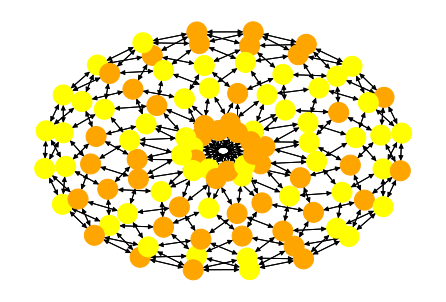

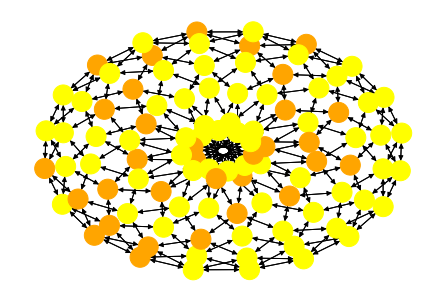

In [277]:
T=1000

G=initialize_network(N,O)
opinions=nx.get_node_attributes(G,'opinion').values()
nx.draw(G,with_labels=False,node_size=400,node_color=list(map(color,opinions)),pos=nx.kamada_kawai_layout(G))
plt.show()

G,origins = update_graph_T_times(G,T)
opinions=nx.get_node_attributes(G,'opinion').values()
nx.draw(G,with_labels=False,node_size=400,node_color=list(map(color,opinions)),pos=nx.kamada_kawai_layout(G))

In [278]:
c = get_opinion_origin_frequency(origins)
print('The actor that had the most influential initial opinion has influenced {} final opinions.'.format(c[0][1]))
print('In the end, only the initial opinions of {} actors remained.'.format(len(c)))

The actor that had the most influential initial opinion has influenced 15 final opinions.
In the end, only the initial opinions of 17 actors remained.


### T=2000

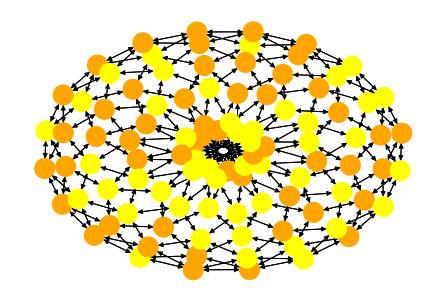

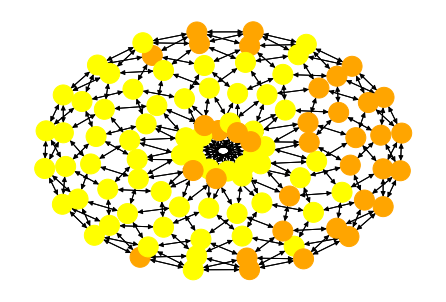

In [279]:
T=2000

G=initialize_network(N,O)
opinions=nx.get_node_attributes(G,'opinion').values()
nx.draw(G,with_labels=False,node_size=400,node_color=list(map(color,opinions)),pos=nx.kamada_kawai_layout(G))
plt.show()

G,origins = update_graph_T_times(G,T)
opinions=nx.get_node_attributes(G,'opinion').values()
nx.draw(G,with_labels=False,node_size=400,node_color=list(map(color,opinions)),pos=nx.kamada_kawai_layout(G))

In [280]:
c = get_opinion_origin_frequency(origins)
print('The actor that had the most influential initial opinion has influenced {} final opinions.'.format(c[0][1]))
print('In the end, only the initial opinions of {} actors remained.'.format(len(c)))

The actor that had the most influential initial opinion has influenced 25 final opinions.
In the end, only the initial opinions of 6 actors remained.


## Questão 2

In [294]:
def get_influencers(position,N):
    
    if position == 1:
        inf = [N,2]
    elif position == N:
        inf = [N-1,1]
    else:
        inf = [position-1,position+1]
    
    return(inf)

def initialize_network(N,O):
    
    ########### AQUI ESTA A MUDANCA #############
    X = random.choices(O,[0.7,0.3],k=10)
    #############################################
    
    G = nx.DiGraph()
    G.add_nodes_from(range(1,N))
    
    for i in range(1,N+1):
        inf1,inf2 = get_influencers(i,N)
        G.add_edges_from(([inf1,i],[inf2,i]))
    
    df = pd.DataFrame()
    df['node'] = range(1,N+1)
    df['opinion']=X
    
    node_attr = df.set_index('node').to_dict('index')
    nx.set_node_attributes(G, node_attr)
    
    return(G)

def update_graph(G):
    
    N = len(G.nodes)
    
    An = random.randint(1,N)
    influencers = list(G.neighbors(An))
    
    chosen_influencer = random.choice(influencers)
    new_opinion = nx.get_node_attributes(G,'opinion')[chosen_influencer]
    G.nodes[An]['opinion'] = new_opinion
    
    return(G,An,chosen_influencer)

### Simule o sistema e anote o valor da última opinião emitida pelo ator 10 até o instante T = 100. Repita a simulação de forma independente 100 vezes e calcule a proporção de vezes em que a última opinião emitida pelo ator 10 até o instante 100 foi +1. Faça o mesmo em relação ao ator 5.

#### Obs:rodei 10000 vezes

In [335]:
N=10
T=100
origin10list=[]

for i in range(10000):
    G=initialize_network(N,O)
    G,origins = update_graph_T_times(G,T)
    origin10 = seek_opinion_origin(origins,10)
    origin10list.append(origin10)

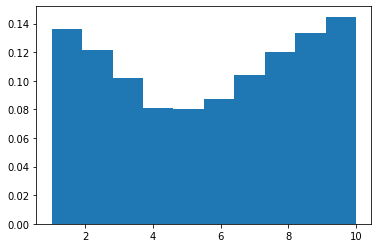

In [376]:
plt.hist(origin10list,density=True);

In [378]:
N=10
T=100
origin5list=[]

for i in range(10000):
    G=initialize_network(N,O)
    G,origins = update_graph_T_times(G,T)
    origin5 = seek_opinion_origin(origins,5)
    origin5list.append(origin5)

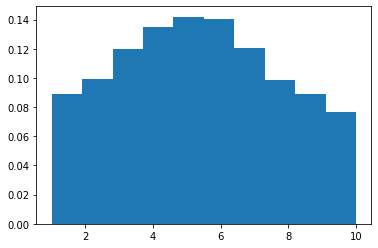

In [383]:
plt.hist(origin5list,density=True);

## Questão 3: um robô é representado por um ator que não se deixa influenciar pelos demais atores e mantem fixada a sua opinião. No modelo do exemplo 1, vamos supor que o ator 5 seja um robô que mantenha uma opinião fixa em −1.

In [385]:
def initialize_network(N,O):
    
    ########### AQUI ESTA A MUDANCA #############
    X = random.choices(O,k=N)
    X[4] = 0
    #############################################
    
    G = nx.DiGraph()
    G.add_nodes_from(range(1,N))
    
    for i in range(1,N+1):
        inf1,inf2 = get_influencers(i,N)
        G.add_edges_from(([inf1,i],[inf2,i]))
    
    df = pd.DataFrame()
    df['node'] = range(1,N+1)
    df['opinion']=X
    
    node_attr = df.set_index('node').to_dict('index')
    nx.set_node_attributes(G, node_attr)
    
    return(G)

def update_graph(G):
    
    N = len(G.nodes)
    
    An = random.randint(1,N)
    
    ############## NOVA FUNCIONALIDADE ###################
    # Ator 5 é robô => ele sempre é o próprio influencer #
    
    if An != 5:
        influencers = list(G.neighbors(An))

        chosen_influencer = random.choice(influencers)
        new_opinion = nx.get_node_attributes(G,'opinion')[chosen_influencer]
        G.nodes[An]['opinion'] = new_opinion
    else:
        chosen_influencer = 5
    
    return(G,An,chosen_influencer) 

### Checar mudanças no comportamento da questão 1

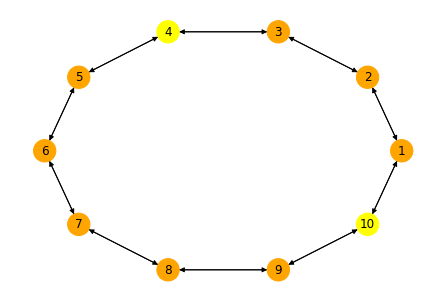

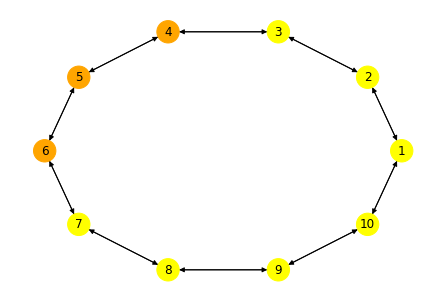

In [409]:
O = [0,1] # lista de opinioes
N=10
T=100

G=initialize_network(N,O)
show_network(G)
G,origins = update_graph_T_times(G,T)
show_network(G)

# Este plot é da rede inicial vs. rede apos T iteraçoes

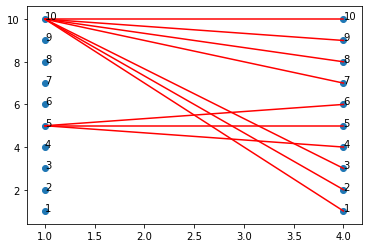

In [410]:
plot_opinion_origins(origins)

### Vamos ver exemplos de possiveis situacoes de distribuicao de influencia com T=100

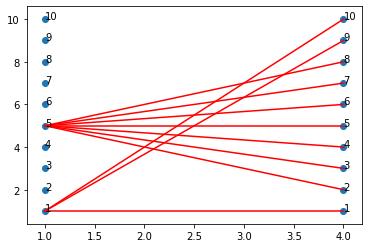

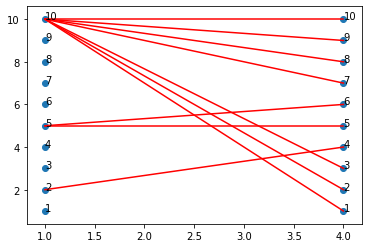

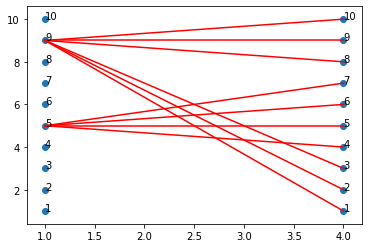

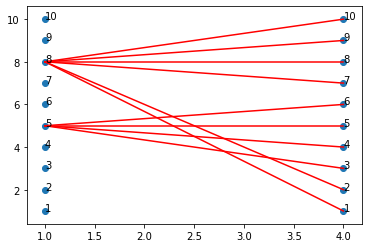

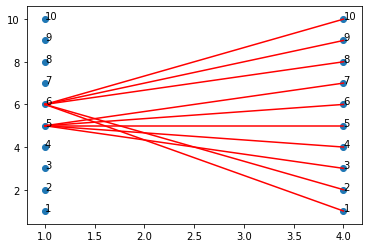

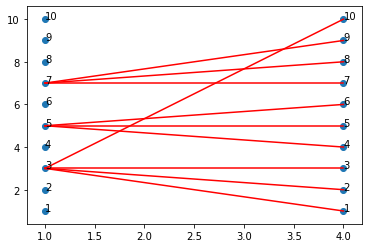

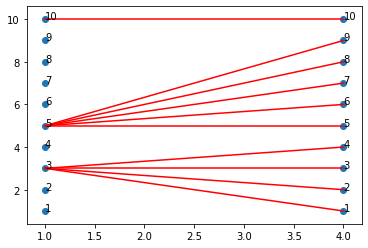

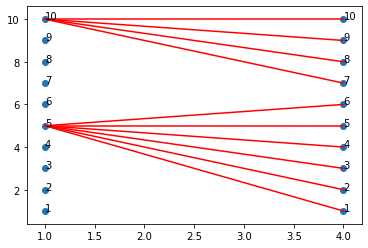

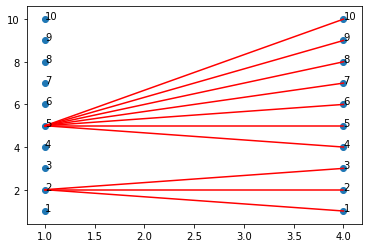

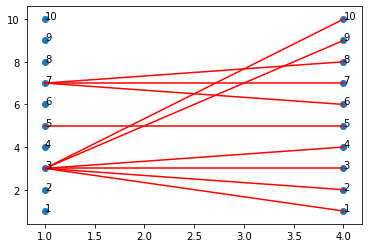

In [406]:
for i in range(10):
    G=initialize_network(N,O)
    G,origins = update_graph_T_times(G,T)
    plot_opinion_origins(origins)

### Agora vamos ver no cenário em que o consenso é atingido

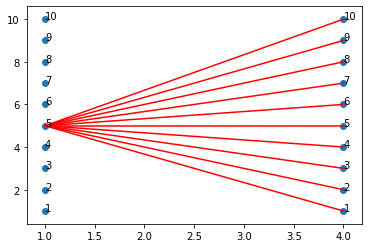

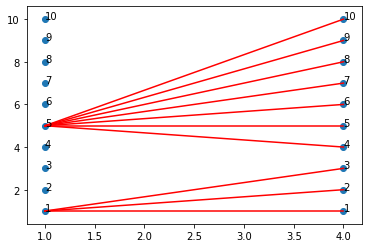

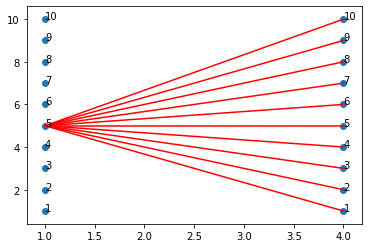

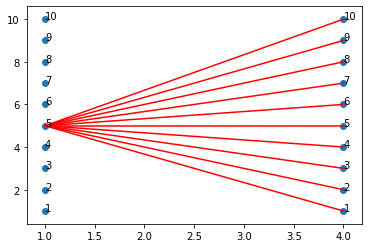

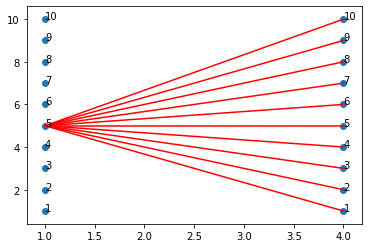

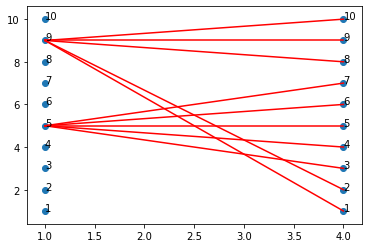

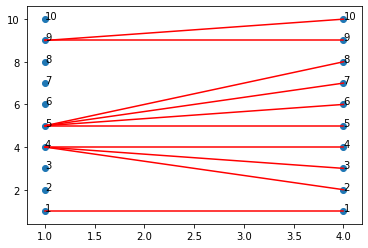

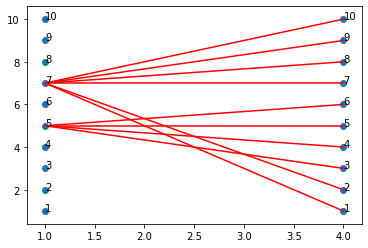

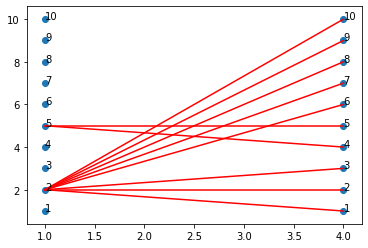

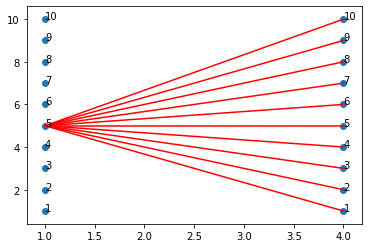

In [412]:
for i in range(10):
    G=initialize_network(N,O)
    G,_,origins = update_graph_until_consensus(G)
    plot_opinion_origins(origins)

### Checar mudanças no comportamento da questão 2

In [413]:
def initialize_network(N,O):
    
    ########### AQUI ESTA A MUDANCA #############
    X = random.choices(O,[0.7,0.3],k=10)
    X[4] = 0
    #############################################
    
    G = nx.DiGraph()
    G.add_nodes_from(range(1,N))
    
    for i in range(1,N+1):
        inf1,inf2 = get_influencers(i,N)
        G.add_edges_from(([inf1,i],[inf2,i]))
    
    df = pd.DataFrame()
    df['node'] = range(1,N+1)
    df['opinion']=X
    
    node_attr = df.set_index('node').to_dict('index')
    nx.set_node_attributes(G, node_attr)
    
    return(G)

In [414]:
N=10
T=100
origin10list=[]

for i in range(10000):
    G=initialize_network(N,O)
    G,origins = update_graph_T_times(G,T)
    origin10 = seek_opinion_origin(origins,10)
    origin10list.append(origin10)

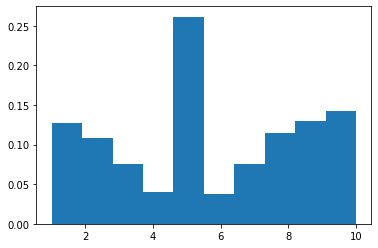

In [415]:
plt.hist(origin10list,density=True);